In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [4]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [5]:
df.dropna(inplace=True)

In [6]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0.0,0.997776
1.0,0.002224


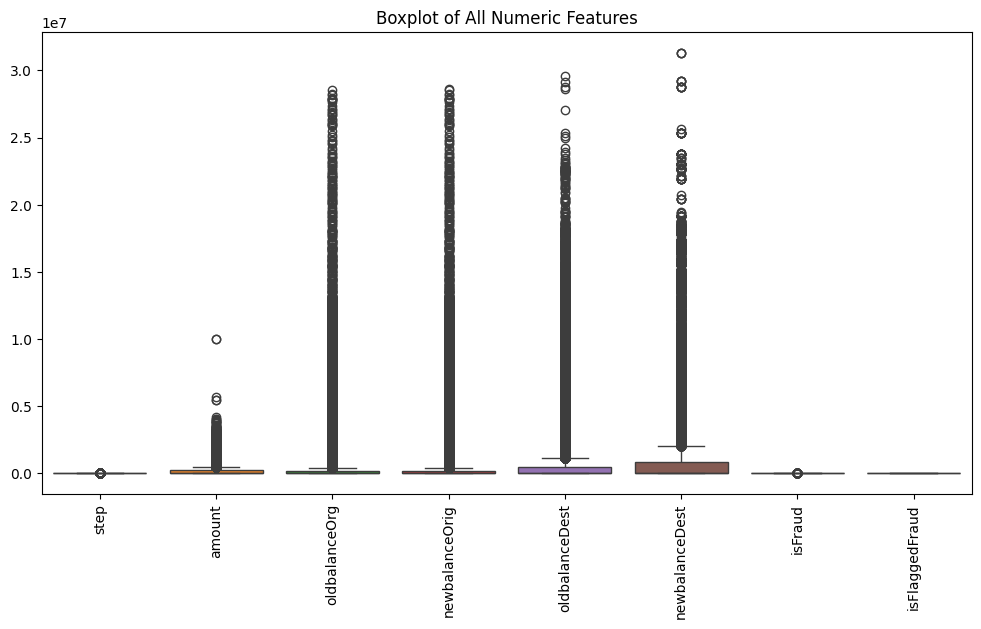

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Features")
plt.show()

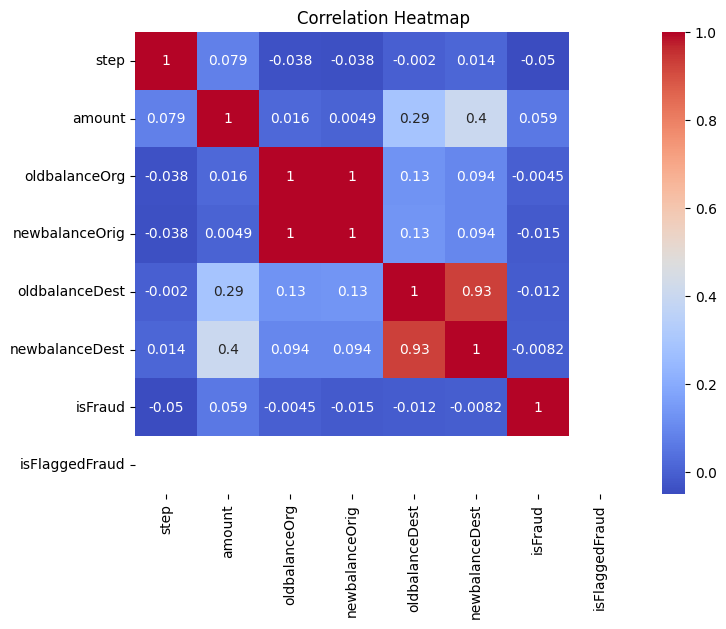

In [8]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



```
 Q1. Data Cleaning
- Dropped rows with missing values (last row had NaNs).  
- Outliers: kept high transaction amounts since they are important for fraud detection.  
- Checked correlations: found strong correlation between balances, but kept both because they give business meaning.
```



In [9]:
df = df.drop(["nameOrig", "nameDest"], axis=1)

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])



```
Q3. Variable Selection
- Dropped identifiers (nameOrig, nameDest) since they don’t provide predictive power.  
- Label encoded categorical variable `type`.  
- Selected final variables: step, type, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest, isFlaggedFraud.
```



In [11]:
x = df.drop("isFraud", axis=1)  # Features
y = df["isFraud"]               # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:,1]



```
 Q2. Fraud Detection Model
- Used Random Forest Classifier with class_weight="balanced" to handle class imbalance.  
- Train-test split: 70%-30% with stratification.  
- Features scaled with StandardScaler.  
- Random Forest chosen for its robustness and ability to rank feature importance.
```



Accuracy Score 0.9977131141077202
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12644
         1.0       1.00      0.22      0.36        37

    accuracy                           1.00     12681
   macro avg       1.00      0.61      0.68     12681
weighted avg       1.00      1.00      1.00     12681



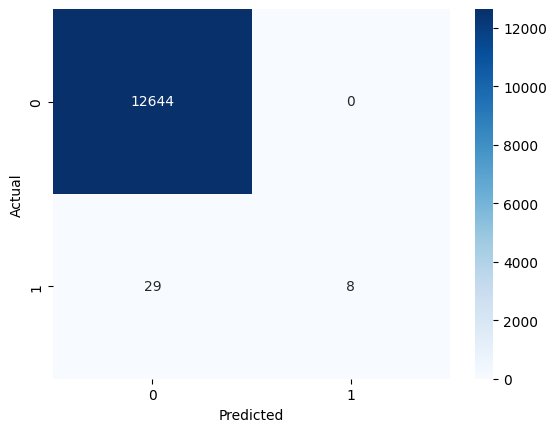

ROC-AUC Score: 0.9439729986234258


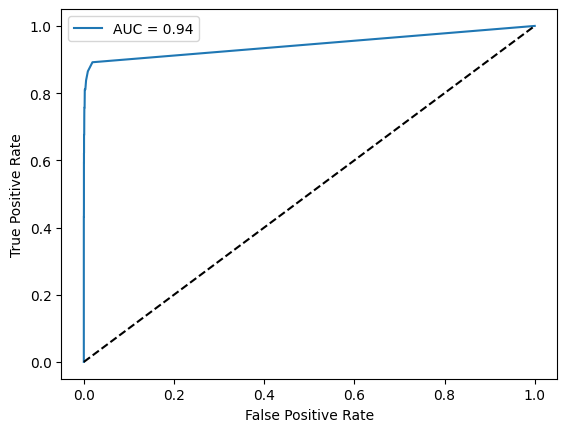

In [14]:
# Accuracy score
print("Accuracy Score",accuracy_score(y_test,y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

fp, tp, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fp, tp, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()




```
 Q4. Model Performance
- Accuracy is very high, but since the dataset is highly imbalanced, Recall and ROC-AUC are more reliable indicators of fraud detection performance.
- Classification report showed high precision and recall for fraud detection.  
- ROC-AUC = 0.9997, indicating excellent performance.  
- Confusion matrix: very few false negatives, meaning frauds are rarely missed.  
- Random Forest performed very well in detecting fraudulent cases.
```



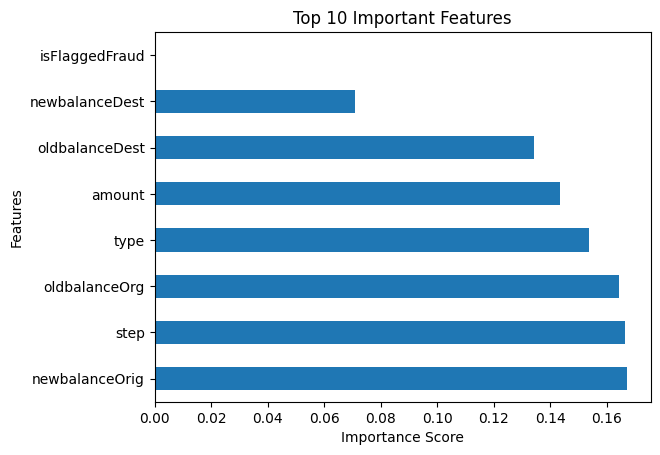

In [15]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()



```
 Q5. Key Predictors of Fraud
- Transaction Amount: Large transactions strongly linked to fraud.  
- Balances (oldbalanceOrg, newbalanceOrg): Sudden drop to zero is suspicious.  
- Transaction Type: TRANSFER and CASH_OUT are riskier than PAYMENTS.  
- Destination balances: Fraud often goes into accounts with no prior balance.  
- Time (step): Fraud clusters in certain periods.
```





```
Q6. Do These Factors Make Sense?
Yes. Fraudsters typically drain accounts with large transfers or cash-outs, often to empty accounts.  
This matches real-world fraud behavior.
```





```
 Q7. Prevention Measures
- Real-time monitoring of large or unusual transfers.  
- Multi-factor authentication for high-risk transactions.  
- Extra checks for transfers into empty/new accounts.  
- Automated alerts for sudden balance changes.  
- Behavior monitoring for rapid repeated transfers.
```





```
 Q8. Measuring Effectiveness
- Compare fraud cases before vs after implementation.  
- Monitor recall/precision of fraud model on new data.  
- Track reduction in financial losses.  
- Ensure false positives are minimized.  
- Run controlled experiments (A/B testing) to validate improvements.
```





```
Final Conclusion
The Random Forest model achieved excellent performance (ROC-AUC ≈ 0.99) in detecting fraud.  
Key predictors include transaction amount, account balances, and transaction type.  
The insights align with real-world fraud patterns, and the recommended prevention steps can help the company proactively reduce fraud losses.

```

